In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy import signal
from scipy.signal import butter, lfilter, freqz
from scipy.stats import entropy

In [166]:
SCALE_FACTOR = (4500000)/24/(2**23-1) #From the pyOpenBCI 
fs = 250

def Signal(file,RC):
    channel_1=(np.loadtxt(file,delimiter=',',skiprows=200,usecols=[RC]))* SCALE_FACTOR 
    return channel_1


def butter_bandpass(lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_highpass(data, highcut, fs, order=2):
    nyq = 0.5 * fs
    high = highcut / nyq
    b, a = butter(order, high, btype='high')
    filtrada = lfilter(b, a, data)
    return filtrada


def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


#FfILTRO NOTCH 60 HZ
def notch_filter(val, data, fs=250):
        notch_freq_Hz = np.array([float(val)])
        for freq_Hz in np.nditer(notch_freq_Hz):
            bp_stop_Hz = freq_Hz + 3.0 * np.array([-1, 1])
            b, a = signal.butter(3, bp_stop_Hz / (fs / 2.0), 'bandstop')
            fin = data = signal.lfilter(b, a, data)
        return fin

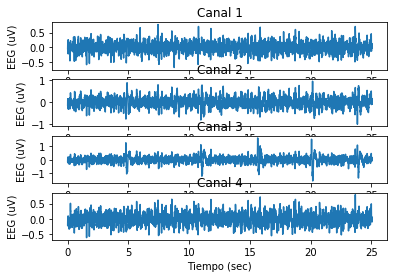

In [167]:
archivo = '5h1.txt'

Ch1=Signal(archivo,2)
Ch2=Signal(archivo,3)
Ch3=Signal(archivo,4)
Ch4=Signal(archivo,5)


fs=250                                              #Frecuencia de muestreo 250 Hz
lowcut = 2
highcut = 40


Ch11 = notch_filter(60, Ch1)
Ch22 = notch_filter(60, Ch2)
Ch33 = notch_filter(60, Ch3)
Ch44 = notch_filter(60, Ch4)

y1 = butter_bandpass_filter(Ch11, lowcut, highcut, fs, order=4)
y2 = butter_bandpass_filter(Ch22, lowcut, highcut, fs, order=4)
y3 = butter_bandpass_filter(Ch33, lowcut, highcut, fs, order=4)
y4 = butter_bandpass_filter(Ch44, lowcut, highcut, fs, order=4)


y1 = y1[1000:len(y1)]
y2 = y2[1000:len(y2)]
y3 = y3[1000:len(y3)]
y4 = y4[1000:len(y4)]


#Variables para plotear con menos lineas de codigo
EEG = np.zeros(shape=(len(y1),5))
tiempo = np.arange(len(y1))/fs
Nfilas = 4
Ncols  = 1

EEG[:,1] = y1
EEG[:,2] = y2
EEG[:,3] = y3
EEG[:,4] = y4

plt.figure(1)
for i in range(1,5):
    plt.subplot(Nfilas, Ncols, i)
    plt.plot(tiempo,EEG[:,i])
    plt.xlabel("Tiempo (sec)")       
    plt.ylabel("EEG (uV)")
    plt.title("Canal " + str(i))

63
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 128000 is greater than input length  = 6262, using nperseg = 6262
  .format(nperseg, input_length))


Text(0.5, 1.0, 'Canal 2 5h3')

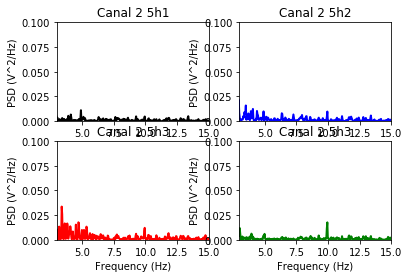

In [168]:
win = 512 * fs
freqs_1, psd_1 = signal.welch(y1, fs, nperseg=win)
freqs_2, psd_2 = signal.welch(y2, fs, nperseg=win)
freqs_3, psd_3 = signal.welch(y3, fs, nperseg=win)
freqs_4, psd_4 = signal.welch(y4, fs, nperseg=win)

Dos = ((2.5*100)/max(freqs_2))/100
Rango = int(np.ceil(Dos*len(freqs_2)))

Quince = ((15*100)/max(freqs_2))/100
Rango2 = int(np.ceil(Quince*len(freqs_2)))

print(Rango)

freqs_1 = freqs_1[Rango:Rango2]
freqs_2 = freqs_2[Rango:Rango2]
freqs_3 = freqs_3[Rango:Rango2]
freqs_4 = freqs_4[Rango:Rango2]

psd_1 = psd_1[Rango:Rango2]
psd_2 = psd_2[Rango:Rango2]
psd_3 = psd_3[Rango:Rango2]
psd_4 = psd_4[Rango:Rango2]



plt.figure(2)
plt.subplot(221)
plt.plot(freqs_1,psd_1, color='K', lw=2)
plt.ylabel("PSD (V^2/Hz)")
plt.ylim([0, 0.1])
plt.xlim([3, 15])
plt.title("Canal 2 5h1")
plt.subplot(222)
plt.plot(freqs_2, psd_2, color='B', lw=2)
plt.ylabel("PSD (V^2/Hz)")
plt.ylim([0, 0.1])
plt.xlim([3, 15])
plt.title("Canal 2 5h2")
plt.subplot(223)
plt.plot(freqs_3, psd_3, color='R', lw=2)
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (V^2/Hz)")
plt.ylim([0, 0.1])
plt.xlim([3, 15])
plt.title("Canal 2 5h3")
plt.subplot(224)
plt.plot(freqs_4, psd_4, color='G', lw=2)
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (V^2/Hz)")
plt.ylim([0, 0.1])
plt.xlim([3, 15])
plt.title("Canal 2 5h3")

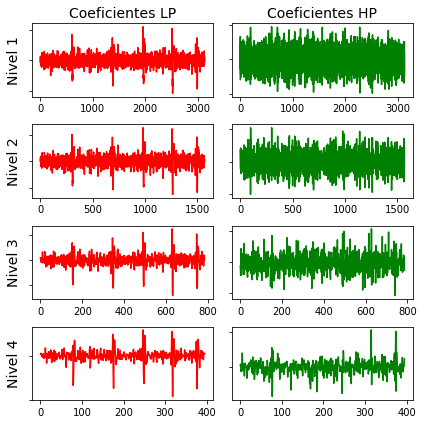

In [169]:
data = y3
waveletname = 'db3'

CA = [[],[]]
CD = [[],[]]

fig, axarr = plt.subplots(nrows=4, ncols=2, figsize=(6,6))
for ii in range(4):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Nivel {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Coeficientes LP", fontsize=14)
        axarr[ii, 1].set_title("Coeficientes HP", fontsize=14)
    if ii == 2:
        CA[0] = data
        CD[0] = coeff_d
    if ii == 3:
        CA[1] = data
        CD[1] = coeff_d
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 128000 is greater than input length  = 687, using nperseg = 687
  .format(nperseg, input_length))


(2, 25)

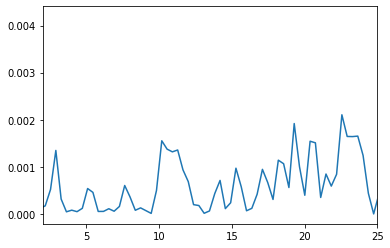

In [170]:
win = 512*fs
fff, psdd = signal.welch(CD[0][100:len(CD[0])], fs, nperseg=win)
plt.plot(fff, psdd)
plt.xlim([2,25])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1970: UserWarning: nperseg = 128000 is greater than input length  = 286, using nperseg = 286
  .format(nperseg, input_length))


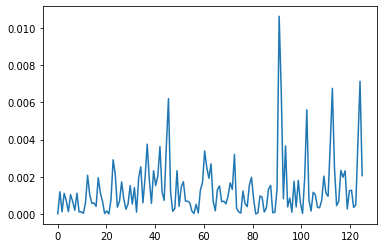

In [171]:
fff2, psdd2 = signal.welch(CD[1][100:len(CD[1])-10], fs, nperseg=win)
plt.plot(fff2, psdd2)

In [172]:
Energy = 0
for E in range(len(psdd)):
    Energy = Energy + psdd[E]*psdd[E]
Energy

0.00036576785452790446

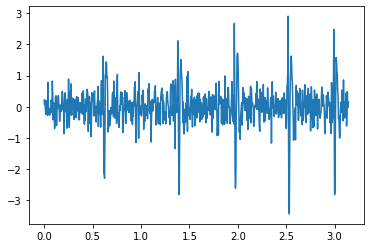

In [173]:
Wsignal = butter_highpass(CA[0], 2, 250)
Wtiempo = np.arange(len(Wsignal))/fs
plt.plot(Wtiempo,Wsignal)